In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
img = cv2.imread("C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\car_plate.jpg")

In [13]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)   
    ax.imshow(img)

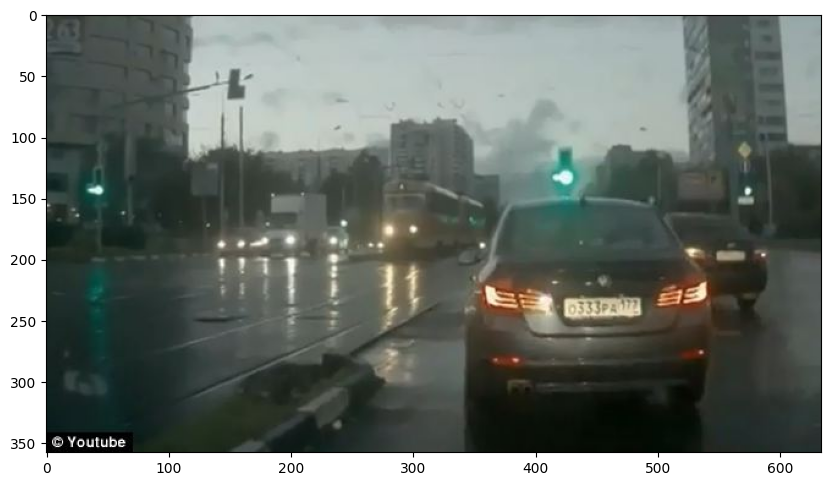

In [14]:
display(img)

In [15]:
plate_cascade = cv2.CascadeClassifier("C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\haarcascades\\haarcascade_russian_plate_number.xml")

In [42]:


img = cv2.imread("C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\car_plate.jpg")
def detect_plate(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3)  
    
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (255,0,0), 4) 
    
       
    return plate_img

In [43]:
result = detect_plate(img)

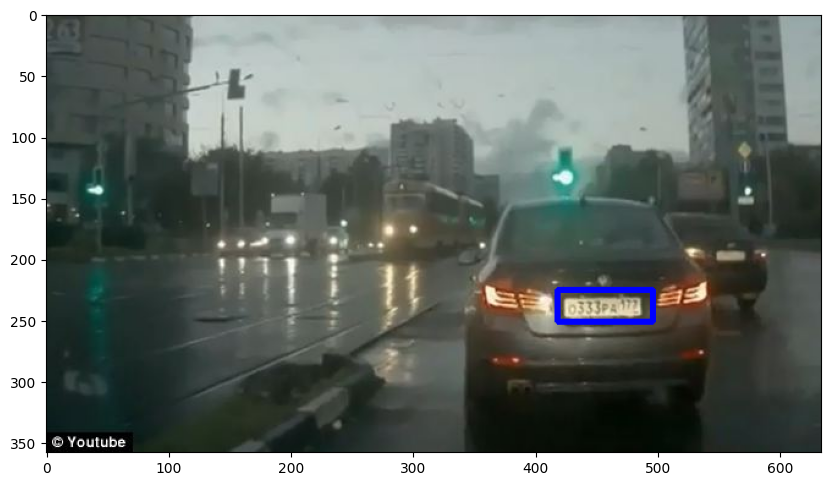

In [44]:
display(result)

In [45]:
def detect_and_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects:
        roi = roi[y:y+h,x:x+w] # plate rectin içindeki alanı alıyoruz 
        blurred_roi = cv2.medianBlur(roi, 7)
        plate_img[y:y+h,x:x+w] = blurred_roi # blurlu alanı orjinal resme geri yerleştiriyoruz
        
    return plate_img

In [46]:
result = detect_and_blur_plate(img)

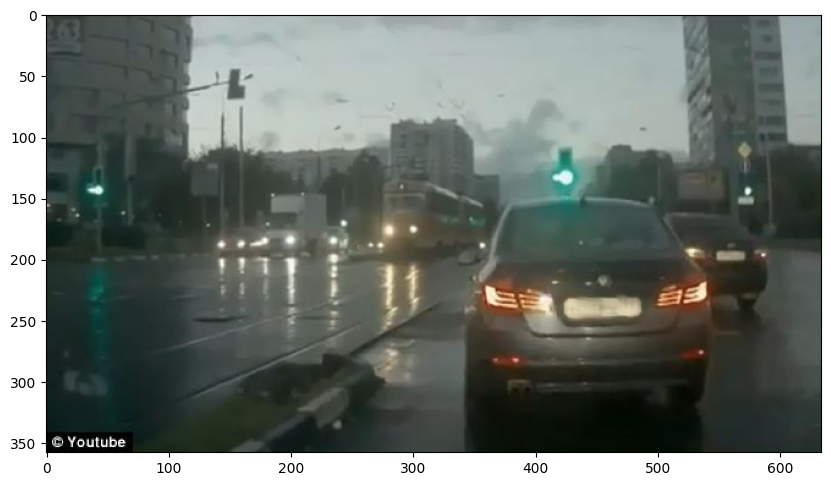

In [47]:
display(result)